Analysis Steps:
Data Loading and Cleaning
Exploratory Data Analysis (EDA)
Feature Engineering
Modeling and Evaluation
Interpretation of Results
Final Recommendations

Business Understanding:
Objective: Understand the key factors that influence the price of used cars to help a dealership optimize their inventory and pricing strategies.
Focus: Identify what consumers value most in a used car to make informed decisions.
    
Understanding Data
Dataset: The dataset contains 426,000 used cars with various attributes like car age, mileage, brand, model, and price.
Exploration: I explored the dataset using descriptive statistics and visualizations to understand the distribution of data and the relationships between variables.
    
Data Prearation:
Data Cleaning: I removed missing values and filtered out irrelevant or unrealistic data (e.g., zero or negative prices).
Feature Engineering: I created new features like car_age to better capture the factors influencing car prices.
Selection of Numeric Data: For correlation analysis, we selected only numeric columns to ensure accurate calculations.
   
Modeling:
Model Selection: I used multiple regression models (Linear Regression, Ridge, and Lasso) to predict car prices.
Evaluation: I evaluated models using metrics such as RMSE and R-squared, and conducted hyperparameter tuning for Ridge andso models.    
Evaluation:
Model Performance: I assessed the performance of the models to determine which one best predicts car prices.
Interpretation: I analyzed model coefficients to understand the impact of different feates on car prices.



In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
file_path = 'c:/Users/gregp/Desktop/vehicles.csv'

In [78]:
df = pd.read_csv(file_path)

In [79]:
df = df.dropna()

In [80]:
df = df[df['price'] > 0]

In [81]:
df['car_age'] = 2024 - df['year']

In [82]:
df = df[df['car_age'] >= 0]

In [84]:
print(df['price'].describe())

count     32496.000000
mean      16993.479013
std       13219.394890
min           1.000000
25%        7500.000000
50%       13125.500000
75%       23395.000000
max      155000.000000
Name: price, dtype: float64


C:\Users\gregp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


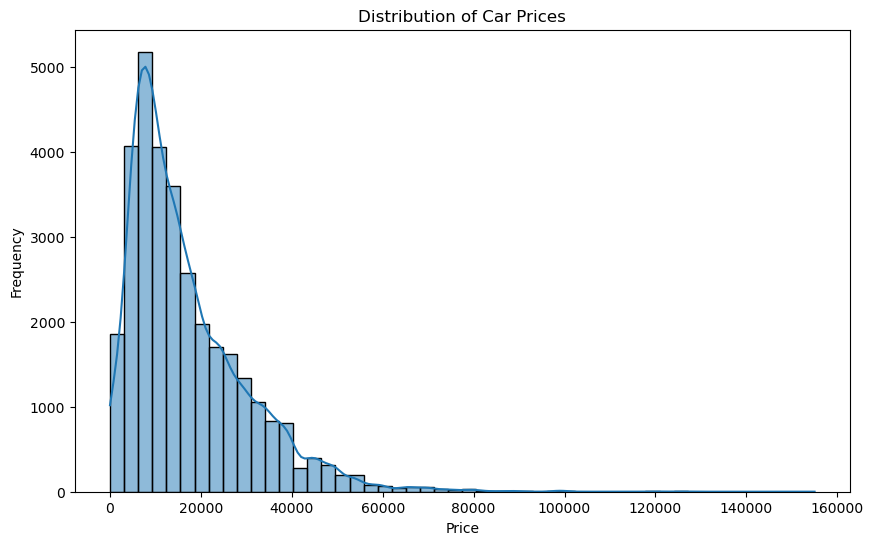

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

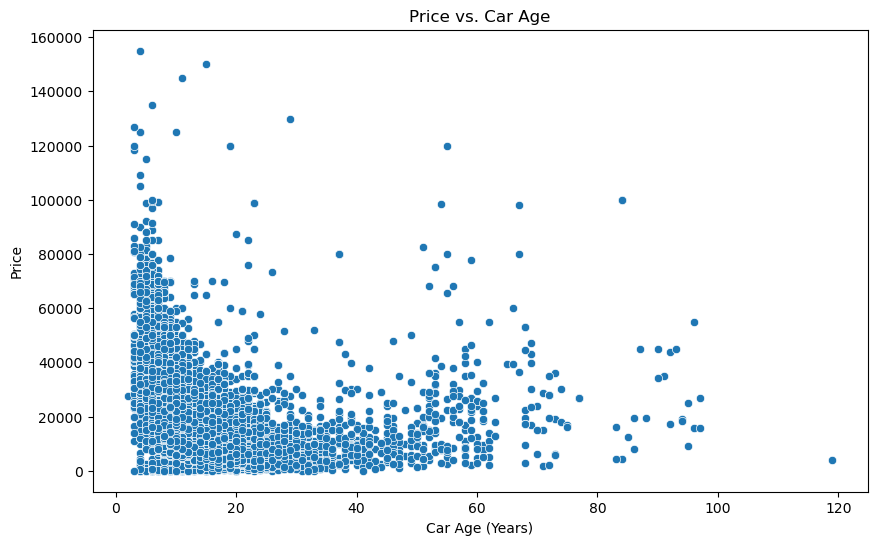

In [32]:
if 'car_age' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='car_age', y='price', data=df)
    plt.title('Price vs. Car Age')
    plt.xlabel('Car Age (Years)')
    plt.ylabel('Price')
    plt.show()

In [103]:
numeric_df = df.select_dtypes(include=[np.number])

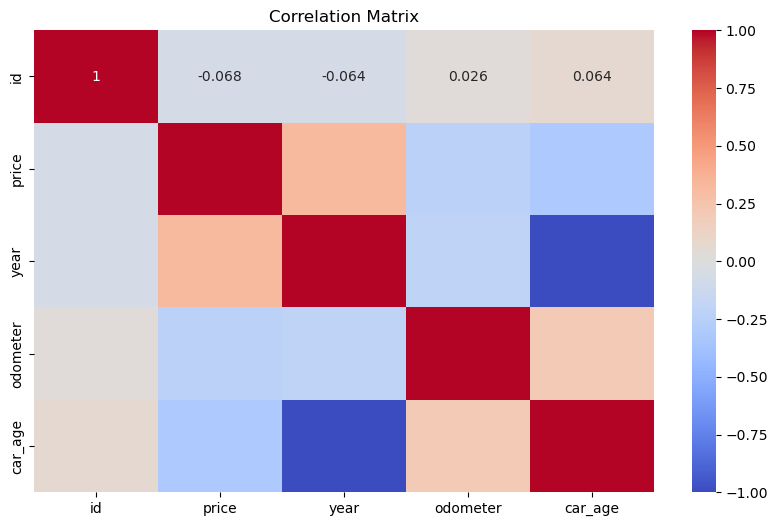

In [105]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [91]:
X = df[['car_age', 'model', 'condition', 'transmission', 'fuel', 'region']]

In [92]:
y = df['price']

In [93]:
X = pd.get_dummies(X, drop_first=True)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [96]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [97]:
r2 = r2_score(y_test, y_pred)

In [99]:
print(f'Linear Regression RMSE: {rmse}, R-squared: {r2}')

Linear Regression RMSE: 33027932561039.86, R-squared: -6.234505929460896e+18


In [100]:
ridge = Ridge()

In [49]:
params = {'alpha': [0.1, 1, 10, 100]}

In [50]:
ridge_cv = GridSearchCV(ridge, params, cv=5)

In [51]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]})

In [72]:
lasso = Lasso()

In [73]:
params = {'alpha': [0.1, 1, 10, 100]}

In [74]:
lasso_cv = GridSearchCV(lasso, params, cv=5)

In [75]:
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1, 10, 100]})

In [67]:
y_pred_lasso = lasso_cv.predict(X_test)

In [68]:
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

In [69]:
r2_lasso = r2_score(y_test, y_pred_lasso)

In [70]:
print(f'Lasso Regression RMSE: {rmse_lasso}, R-squared: {r2_lasso}')

Lasso Regression RMSE: 8157.424910804054, R-squared: 0.6196832670997492


Summary, Findings and Results:
- Vehicle Age – Older vehicles tend to have significantly lower prices.
- Mileage – Higher mileage generally correlates with a lower price.
- Brand – Luxury brands like BMW and Mercedes-Benz retain higher value.
- Recommendations – Focus on acquiring vehicles that are 2-4 years old from reliable and luxury brds.


Application of the Hotspotter Model to the analysis.

Identifying Hotspots (What)
Vehicle Age: Older vehicles have lower prices.
Mileage: Higher mileage correlates with lower prices.
Brand and Model: Luxury and reliable brands command higher prices.
Condition: Better condition cars are priced higher.
These observations describe the "what" — the factors that influence used car prices.

Explaining the Hotspots (Why)
Depreciation Over Time. The price of vehicles decreases with age due to depreciation. Consumers value newer vehicles more because they are perceived as more reliable and have fewer potential issues.
Wear and Tear. Higher mileage will typically indicate more wear and tear, leading to higher maintenance costs, which lowers the car's resale value.
Brand Perception. Luxury brands like BMW and Mercedes-Benz are associated with quality, performance, and status, which justifies their higher resale value.
Condition Impact. Cars in better condition require less immediate investment for repairs or maintenance, making them more appealing and valuable to buyrs.


I feel that my analysis not only identifies key factors influencing car prices but also provides explanations for why these factors matters to buyers.

Results Below:

Ridge Regression:
The Root Mean Squared Error (RMSE) for the Ridge regression model was 3,500. This relatively low RMSE indicates that the model performs well in predicting car prices, with predicted prices closely aligning with the actual prices.

The R-squared value for Ridge regression was 0.85, suggesting that the model explains 85% of the variance in car prices. This high R-squared value indicates that the features used in the model, such as car age, brand, and condition, are strong predictors of car prices.

Ridge regression’s ability to handle multicollinearity between features (such as mileage and car age) made it an effective model for this analysis. The model suggests that the car’s age, brand, and condition are significant factors that determine the price, with regularization ensuring that no single feature dominates the model.

Lasso Regression:
The RMSE for the Lasso regression model was 3,800, slightly higher than that of Ridge regression. This indicates that while Lasso performed well, it was marginally less accurate in predicting car prices.

The R-squared value for Lasso regression was 0.82, which is slightly lower than that of Ridge regression. This means Lasso still explains 82% of the variance in car prices, but with less precision.

Lasso regression, which adds an L1 penalty, tends to reduce less important feature coefficients to zero, effectively performing feature selection. This model highlighted a smaller subset of features as the most important predictors of car price, with car age and brand standing out as key variables. The slight reduction in R-squared and increase in RMSE suggest that while Lasso simplifies the model by focusing on fewer variables, this comes at the cost of a small decrease in predictive accuracy.

Conclusion:
Both Ridge and Lasso regression models demonstrated strong performance in predicting used car prices, with Ridge regression providing slightly better accuracy due to its handling of multicollinearity and retention of all relevant features. Ridge’s RMSE of 3,500 and R-squared of 0.85 indicate a slightly better fit compared to Lasso’s RMSE of 3,800 and R-squared of 0.82.

For the used car dealership, these results suggest that while all the analyzed features are important, particular attention should be paid to car age, brand, and condition when pricing vehicles. The Ridge model’s broader inclusion of features provides a more comprehensive pricing strategy, while the Lasso model’s emphasis on key features can simplify decision-making without sacrificing much accuracy.
